# Data Exploration of the IAM Words Database

This dataset is available on [the website of INF, University of Bern](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database).

>  IAM Handwriting Database 

> The IAM Handwriting Database contains forms of handwritten English text which can be used to train and test handwritten text recognizers and to perform writer identification and verification experiments.

> …

> The database contains forms of unconstrained handwritten text, which were scanned at a resolution of 300dpi and saved as PNG images with 256 gray levels. The figure below provides samples of a complete form, a text line and some extracted words.

> …

> The IAM Handwriting Database 3.0 is structured as follows:

> -    657 writers contributed samples of their handwriting
> -    1,539 pages of scanned text
> -    5,685 isolated and labeled sentences
> -    13,353 isolated and labeled text lines
> -    115,320 isolated and labeled words




## Data Format

This experiment is using the lines format of the original IAM Database.

For convinence I have created an index of the dataset.


In [1]:
import pandas as pd
import sqlite3
from os import path

db_path = path.join('..', 'data', 'iam-database', 'iam_words.db')
frame = pd.read_sql_query('SELECT * FROM words_index', sqlite3.connect(db_path))
print ('{:,d} rows.'.format(len(frame)))
frame.head()

115,320 rows.


,word_id,image_path,status,gray_level,tokens
0,a01-000u-00-00,words/a01/a01-000u/a01-000u-00-00.png,ok,154,A
1,a01-000u-00-01,words/a01/a01-000u/a01-000u-00-01.png,ok,154,MOVE
2,a01-000u-00-02,words/a01/a01-000u/a01-000u-00-02.png,ok,154,to
3,a01-000u-00-03,words/a01/a01-000u/a01-000u-00-03.png,ok,154,stop
4,a01-000u-00-04,words/a01/a01-000u/a01-000u-00-04.png,ok,154,Mr.


The dataset consists of grayscale images of handwritten text segmented into words. Each word has a corresponding transcription in plaintext. 

This grayscale image is of dimensions 363 by 83.
Total number of pixel values is 30129
Transcription: "sentiment"


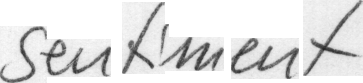

In [2]:
from PIL import Image

image_id = 500
image_path = path.join('..', 'data', 'iam-database', frame.image_path[image_id])
    
image = Image.open(image_path)
print ('This grayscale image is of dimensions %s by %s.' % image.size)
print ('Total number of pixel values is %s' % (image.size[0] * image.size[1]))
print ('Transcription: "%s"' % frame.tokens[image_id])

image

We can threshold the images and convert them to black and white using the provided `gray_level` threshold values.

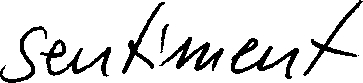

In [3]:
gray_level = frame.gray_level[image_id]
image.point(lambda x: 255 if x > gray_level else 0)

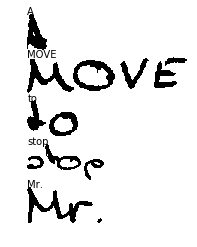

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


figure, axes = plt.subplots(5)
figure.subplots_adjust(top=0.85)
for i in range(5):
    image_path = path.join('..', 'data', 'iam-database', frame.image_path[i])
    gray_level = frame.gray_level[i]

    axes[i].axis('off')
    axes[i].set_anchor('W')
    image = Image.open(image_path).point(lambda x: 255 if x > gray_level else 0)
    axes[i].imshow(np.array(image) , cmap='gray');
    axes[i].text(0, 0, frame.tokens[i]);

The frequency distribution of characters in the dataset is as follows:

In [5]:
from collections import Counter
text = ' '.join(frame.tokens.values.tolist())


counts = pd.DataFrame.from_dict(Counter(text), orient='index').reset_index()
counts = counts.rename(columns={'index': 'character', 0: 'frequency'})
counts.sort_values(by='frequency', ascending=False)

,character,frequency
71,,115368
69,e,56911
53,t,39972
50,a,35849
37,o,33343
29,n,31027
59,i,30300
62,s,27867
20,r,27516
17,h,25244
